# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Ni Kadek Rina Ardianti
- **Email:** ardianti259@gmail.com
- **ID Dicoding:** B25B9D033

## Menentukan Pertanyaan Bisnis

Pertanyaan yang disususn berdasarkan materi "Mendefinisikan Pertanyaan Untuk Explorasi Data" dengan menerapkan pendefinisian pertanyaan dengan poin-poin penting yaitu "S.M.A.R.T".
- Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?
- Bagaimana segmentasi tingkat permintaan sepeda (High/Medium/Low) berdasarkan musim dan cuaca?

## Import Semua Packages/Library yang Digunakan

In [123]:
pip install numpy pandas scipy matplotlib seaborn scikit-learn streamlit

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [125]:
day_df = pd.read_csv("https://raw.githubusercontent.com/RinaArdianti/bike-sharing-analysis/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [126]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/RinaArdianti/bike-sharing-analysis/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Bike Sharing Dataset terdiri dari dua tabel yaitu `day_df` dan `hour_df`.
- olom `season` mengkategorikan musim: 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall.
- Kolom workingday menandakan apakah hari tersebut bukan akhir pekan atau libur (1 = hari kerja, 0 = akhir pekan/libur).
- Cuaca dijelaskan oleh weathersit (1 = cerah, 2 = mendung, 3 = hujan/salju ringan, 4 = hujan/salju berat).
- Menambahkan kolom hr untuk analisis penyewaan per jam.

### Assessing Data

Menilai tabel `day_df`

In [127]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [128]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [129]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight untuk tabel day_df:**
- Jumlah Baris adalah 731
- Jumlah kolom adalah 16
- Tidak ada missing values
- Kolom `dteday` masih bertipe **object** perlu diubah mejadi **datetime**
- Terdapat 3 target konsumen yaitu : casual (pengguna non-member), registered (pengguna terdaftar), dan cnt (total penyewaan)
- Kolom `season`, `mnth`, `weekday`, `weatherit` adalah data yang dikategorikan dalam bentu angka
- Tidak ada duplicated data
- Pengguna terdaftar mendominasi penyewaan sepeda dibanding pengguna non-terdaftar
- Nilai rata-rata penyewaan harian mencapai 4504 unit
- Fluktuasi yang besar berdasarkan tergantung kondisi musim dan cuaca

In [130]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [131]:
print("Julmlah duplikasi data:", hour_df.duplicated().sum())

Julmlah duplikasi data: 0


In [132]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight untuk tabel hour_df:**

- Junlah bari adalah 17.379
- Jumlah kolom adalah 17
- Tidak ada missing values
- Kolom `dteday` masih bertipe object perlu dikonversi menjadi datetime
- Kolom target sama seperti `day_df` : casual, registered,cnt
- Fluktuasi besar dalam jumlah penyewaan perjam
- Tidak ada duplicated data

### Cleaning Data

Membersihkan tabel `day_df`

In [133]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memrubah atau memperbaiki tipe data

In [134]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [135]:
cat_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
day_df[cat_columns] = day_df[cat_columns].astype('category')

Mapping kategori untuk day_df

In [136]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weathersit_map = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow/Fog'
}

day_df['season'] = day_df['season'].map(season_map)
day_df['weathersit'] = day_df['weathersit'].map(weathersit_map)


**Insight:**
- Memperbaiki tipe data `dteday` menjadi datetime
- Memperbaiki tipe data `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit` menjadi category untuk mempermudah pada saat visuaslisasi data

Membersihkan tabel `hour_df`

In [137]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [138]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [139]:
cat_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
hour_df[cat_columns] = hour_df[cat_columns].astype('category')

In [140]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Memperbaiki tipe data `dteday` menjadi datetime
- Memperbaiki tipe data `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`, dan `hr` menjadi category untuk mempermudah pada saat visuaslisasi data

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [141]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
552,553,2012-07-06,Fall,1,7,0,5,1,Clear/Few clouds,0.828333,0.752533,0.450833,0.146142,1366,4841,6207
127,128,2011-05-08,Summer,0,5,0,0,0,Clear/Few clouds,0.528333,0.518933,0.631667,0.074637,1401,2932,4333
612,613,2012-09-04,Fall,1,9,0,2,1,Clear/Few clouds,0.725833,0.686888,0.755000,0.236321,867,5997,6864
7,8,2011-01-08,Spring,0,1,0,6,0,Mist/Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959
83,84,2011-03-25,Summer,0,3,0,5,1,Clear/Few clouds,0.264167,0.256312,0.495000,0.230725,300,1910,2210


In [142]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [143]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.0,731.0,731.0,731.0,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12.0,2.0,7.0,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,1.0,1.0,0.0,0.0,1.0,Clear/Few clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62.0,710.0,105.0,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [144]:
day_df['dteday'].is_unique

True

In [145]:
day_df.duplicated().sum()

np.int64(0)

In [146]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Analisis umum berdasarkan musim

In [147]:
day_df.groupby("season").agg({
    "cnt": ["sum", "mean", "max", "min"],
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean"
}).sort_values(("cnt", "sum"), ascending=False)

/tmp/ipython-input-1140708672.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



cnt                               temp       hum windspeed
            sum         mean   max   min      mean      mean      mean
season                                                                
Fall    1061129  5644.303191  8714  1115  0.706309  0.633482  0.172095
Summer   918589  4992.331522  8362   795  0.544405  0.626948  0.203507
Winter   841613  4728.162921  8555    22  0.422906  0.668719  0.171995
Spring   471348  2604.132597  7836   431  0.297748  0.582903  0.214537

Analisis umum berdasarkan cuaca

In [148]:
day_df.groupby("weathersit").agg({
    "cnt": ["sum", "mean"],
    "temp": "mean",
    "hum": "mean"
}).sort_values(("cnt", "mean"), ascending=False)

/tmp/ipython-input-1881221706.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



cnt                   temp       hum
                      sum         mean      mean      mean
weathersit                                                
Clear/Few clouds  2257952  4876.786177  0.511541  0.565594
Mist/Cloudy        996858  4035.862348  0.470366  0.725887
Light Rain/Snow     37869  1803.285714  0.433440  0.848872

Analisis umum berdasarkan hari kerja (workingday)

In [149]:
day_df.groupby("workingday").agg({
    "cnt": ["sum", "mean"],
    "registered": "mean",
    "casual": "mean"
})

/tmp/ipython-input-3031047813.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



cnt                registered       casual
                sum         mean         mean         mean
workingday                                                
0           1000269  4330.168831  2959.034632  1371.134199
1           2292410  4584.820000  3978.250000   606.570000

Visualisasi umum :
- Rata-rata penyewaan sepede per musim
- Penyewaan Hari Kerja vs Hari Libur

/tmp/ipython-input-2960308187.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



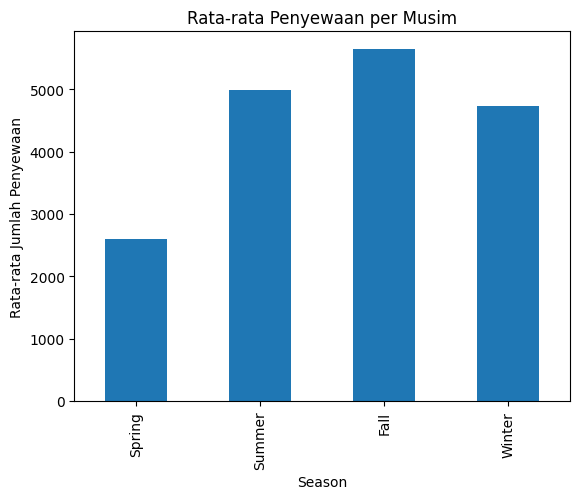

/tmp/ipython-input-2960308187.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



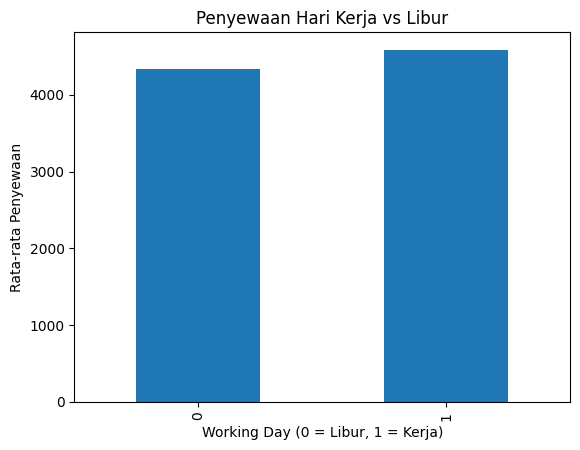

In [150]:
import matplotlib.pyplot as plt

# Jumlah penyewaan per musim
day_df.groupby("season")["cnt"].mean().plot(kind="bar", title="Rata-rata Penyewaan per Musim")

plt.xlabel("Season")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.show()

# Penyewaan per tipe hari kerja
day_df.groupby("workingday")["cnt"].mean().plot(kind="bar", title="Penyewaan Hari Kerja vs Libur")
plt.xlabel("Working Day (0 = Libur, 1 = Kerja)")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

**Insight Analisis Penyewaan Sepeda (`day_df`) :**
**1. Analisis berdasarkan musim (season)**
Dari grafik, kelihatan kalau penyewaan sepeda paling banyak terjadi di musim ke-3 (summer), disusul musim ke-4 (fall).
Sementara di musim ke-1 (winter) jumlah penyewaannya paling sedikit.
- Orang cenderung lebih suka bersepeda saat cuaca hangat dan cerah, jadi musim panas dan gugur jadi waktu favorit.
- Pada saat musim dingin tentunya mendapatkan penyewaan yang sedikit karena musim tidak mumpuni untuk bersepeda.

  **Implikasi:**
- Pihak penyedia sepeda dapat mempersipaan stok lebih banyak atau mengadakan promo pada saat musim panas dan gugur
- Dan pada musim dingin bisa digunakan untuk service sepeda atau tetap adakan promo supaya tetap ada penyewa

**2.Hari Kerja vs Hari Libur**
Dari hasil data dan grafik, penyewaan sepeda di hari kerja sedikit lebih tinggi dibanding hari libur.
Tapi ada pola menarik: **Hari kerja** didominasi oleh **registered users**. Hari libur lebih banyak **casual users**.
Insight sederhana
- Pada hari kerda, sepeda lebih sering digunakan untuk keperluan rutin seperti berangkat sekolah atau bekerja
- Pada saat libur banyak penyewa untuk jalan-jalan santai atau berolahraga


### Explore `hour_df`

In [151]:
hour_df.sample(5)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6018,6019,2011-09-13,3,0,9,8,0,2,1,1,0.60,0.5606,0.81,0.1045,26,399,425
7309,7310,2011-11-06,4,0,11,4,0,0,0,1,0.24,0.2879,0.87,0.0000,0,6,6
6679,6680,2011-10-10,4,0,10,21,1,1,0,1,0.56,0.5303,0.88,0.0896,27,148,175
2156,2157,2011-04-04,2,0,4,17,0,1,1,1,0.74,0.6515,0.23,0.6119,83,283,366
16103,16104,2012-11-08,4,1,11,17,0,4,1,1,0.40,0.4091,0.20,0.2985,36,556,592


In [152]:
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [153]:
hour_df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,7.0,16.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [154]:
print("Apakah instant unik?", hour_df['instant'].is_unique)
print("Jumlah duplikat data:", hour_df.duplicated().sum())
print("Jumlah missing value tiap kolom:")
print(hour_df.isnull().sum())


Apakah instant unik? True
Jumlah duplikat data: 0
Jumlah missing value tiap kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Rata-rata penyewaan perjam

/tmp/ipython-input-511154551.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



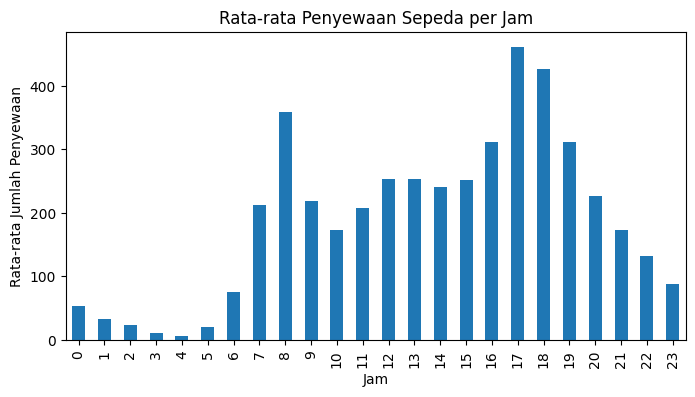

In [155]:
hour_df.groupby("hr")["cnt"].mean().plot(kind="bar", figsize=(8,4), title="Rata-rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.show()


Rata-rata penyewaan berdasarkan hari kerja

/tmp/ipython-input-3341920562.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



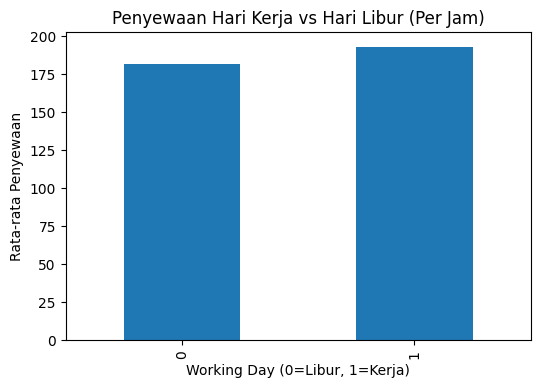

In [156]:
hour_df.groupby("workingday")["cnt"].mean().plot(kind="bar", figsize=(6,4), title="Penyewaan Hari Kerja vs Hari Libur (Per Jam)")
plt.xlabel("Working Day (0=Libur, 1=Kerja)")
plt.ylabel("Rata-rata Penyewaan")
plt.show()


Rata-rata penyewaan berdasarkan kodisi cuaca (perjam)

/tmp/ipython-input-529917882.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



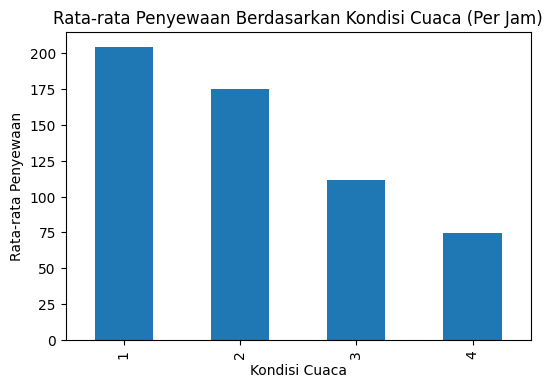

In [157]:
hour_df.groupby("weathersit")["cnt"].mean().plot(kind="bar", figsize=(6,4), title="Rata-rata Penyewaan Berdasarkan Kondisi Cuaca (Per Jam)")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan")
plt.show()


**Insight dari Explore `hour_df`**
- Nilai maksimum penyewaan mencapai 977 sepeda dalam satu jam
- Terlihat variasi besar antar jam dan kondisi cuaca, menunjukkan adanya pola waktu dan faktor lingkungan yang memengaruhi penggunaan sepeda.
- Aktivitas penyewaan meningkat tajam di pagi hari (sekitar pukul 7–9), kemungkinan karena pengguna berangkat kerja atau sekolah.
- Aktivitas terendah terjadi pada dini hari (pukul 1–5), karena waktu istirahat
- Setelah itu menurun di siang hari, lalu meningkat kembali pada sore hari (pukul 16–19) — waktu pulang kerja atau waktu santai.
- Kondisi cerah atau berawan ringan (weathersit = 1) menghasilkan penyewaan tertinggi.
- Penyewaan menurun saat berawan atau berkabut (weathersit = 2).
- Saat hujan ringan atau salju (weathersit = 3), jumlah penyewaan turun drastis.
- Dan pada cuaca ekstrem (weathersit = 4), penyewaan menjadi yang paling rendah.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?

In [158]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Tambahkan demand_level jika belum ada
if 'demand_level' not in day_df.columns:
    day_df['demand_level'] = pd.qcut(day_df['cnt'], q=3, labels=['Low','Medium','High'])

# Merge
merged_df = pd.merge(
    hour_df,
    day_df[['dteday','cnt','demand_level']],
    on='dteday',
    how='left',
    suffixes=('_hour','_day')
)

# Simpan
merged_df.to_csv("merged_bike_data_cleaned.csv", index=False)


In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# =========================================
#  LOAD DATA
# =========================================
merged_df = pd.read_csv("merged_bike_data_cleaned.csv")
merged_df['dteday'] = pd.to_datetime(merged_df['dteday'])
print(merged_df.head())

# =========================================
#  MAP WEATHER DESCRIPTION
# =========================================
weather_labels = {
    1: "Clear / Few Clouds",
    2: "Mist / Cloudy",
    3: "Light Snow / Rain",
    4: "Heavy Rain / Snow / Fog"
}
merged_df['weather_desc'] = merged_df['weathersit'].map(weather_labels)

# =========================================
#  AGREGASI RATA-RATA PENYEWAAN PER JAM
# =========================================
avg_rentals_weather = (
    merged_df.groupby('weather_desc')['cnt_hour']
    .mean()
    .reset_index()
    .rename(columns={'cnt_hour': 'avg_rentals'})
)

# =========================================
#  VISUALISASI
# =========================================
fig_weather = px.bar(
    avg_rentals_weather,
    x='weather_desc',
    y='avg_rentals',
    title='Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Per Jam)',
    labels={'weather_desc': 'Kondisi Cuaca', 'avg_rentals': 'Rata-rata Penyewaan'},
    color='avg_rentals',
    color_continuous_scale='Blues'
)

fig_weather.show()


   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt_hour  \
0           1  0.24  0.2879  0.81        0.0       3          13        16   
1           1  0.22  0.2727  0.80        0.0       8          32        40   
2           1  0.22  0.2727  0.80        0.0       5          27        32   
3           1  0.24  0.2879  0.75        0.0       3          10        13   
4           1  0.24  0.2879  0.75        0.0       0           1         1   

   cnt_day demand_level  
0      985          Low  
1      985      

**Berdasarkan data rata-rata penyewaan sepeda per hari pada berbagai kondisi cuaca:**
- Clear / Few Clouds : 204 -> Cuaca cerah sangat mendukung aktivitas bersepeda, jumlah penyewa tertinggi.
- Mist / Cloudy : 175 -> Cuaca mendung atau berkabut menurunkan penyewaan, tetapi masih relatif tinggi.
- Light Snow / Rain -> Hujan atau salju ringan secara signifikan menurunkan aktivitas bersepeda.
- Heavy Rain / Snow / Fog : 74 -> Cuaca ekstrem hampir menghentikan aktivitas bersepeda.

### Pertanyaan 2: Bagaimana segmentasi tingkat permintaan sepeda (High/Medium/Low) berdasarkan musim dan cuaca?

In [160]:
df = merged_df.copy()
df['demand_level'] = pd.qcut(df['cnt_day'], q=3, labels=['Low','Medium','High'])

# Ubah season menjadi kategori string
season_labels = {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}
df['season_cat'] = df['season'].map(season_labels)


season_demand = df.groupby(['season_cat','demand_level'])['cnt_day'].count().reset_index()
season_demand.rename(columns={'cnt_day':'days_count'}, inplace=True)

fig_season = px.bar(
    season_demand,
    x='season_cat',
    y='days_count',
    color='demand_level',
    barmode='group',
    title='Segmentasi Permintaan Sepeda Berdasarkan Musim',
    labels={'season_cat':'Musim', 'days_count':'Jumlah Hari', 'demand_level':'Tingkat Permintaan'},
    category_orders={'season_cat':['Spring','Summer','Fall','Winter'], 'demand_level':['Low','Medium','High']}
)
fig_season.show()


weather_demand = df.groupby(['weather_desc','demand_level'])['cnt_day'].count().reset_index()
weather_demand.rename(columns={'cnt_day':'days_count'}, inplace=True)

weather_order = sorted(weather_demand['weather_desc'].unique())
fig_weather2 = px.bar(
    weather_demand,
    x='weather_desc',
    y='days_count',
    color='demand_level',
    barmode='group',
    title='Segmentasi Permintaan Sepeda Berdasarkan Kondisi Cuaca',
    labels={'weather_desc':'Kondisi Cuaca', 'days_count':'Jumlah Hari', 'demand_level':'Tingkat Permintaan'},
    category_orders={'weather_desc':weather_order, 'demand_level':['Low','Medium','High']}
)
fig_weather2.show()

/tmp/ipython-input-3482046772.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipython-input-3482046772.py:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Insight:**
**1. Berdasarkan Musim **
- Spring (Musim Semi) -> mayoritas hari berada pada tingkat permintaan **Low** (~3200 hari), sedangkan permintaan **High** hanya sekitar 200 hari.
- Summer (Musim Panas) -> Jumlah hari dengan permintaan **Medium** (1700 hari) dan **High** (1800 hari) hampir seimbang, lebih banyak daripada **Low** (900 hari).
- Fall (Musim Gugur) -> Permintaan **High** (2300 hari) lebih dominan dibanding **Medium** (1900 hari) dan **Low** (300 hari).
- Winter (Musim Dingin) -> Distribusi permintaan **Low**, **Medium**, dan **High** relatif seimbang (1300–1460 hari masing-masing).

**2. Berdasarkan cuaca**
- Clear / Few Clouds: Permintaan **High** (4300 hari) paling dominan dibanding Medium (4000 hari) dan Low (3100 hari).
- Mist / Cloudy: Permintaan **Low** (1750 hari) lebih tinggi daripada High (1300 hari), Medium (1450 hari).
- Light Snow / Rain:Permintaan **Low** (850 hari) jauh lebih tinggi dibanding Medium (380 hari) dan High (180 hari).
- Heavy Rain / Snow / Fog: Hampir tidak ada permintaan sepeda, menunjukkan kondisi cuaca ekstrim membuat orang tidak bersepeda.



## Conclusion

**KESIMPULAN DARI KEDUA PERTANYAAN**
Analisis data menunjukkan bahwa aktivitas penyewaan sepeda sangat dipengaruhi oleh kondisi cuaca dan musim:

1. Pengaruh Musim:

- Musim gugur dan musim panas memiliki jumlah penyewaan sepeda yang tinggi. Musim gugur bahkan menunjukkan dominasi permintaan High, kemungkinan karena cuaca sejuk dan nyaman untuk bersepeda. Musim panas juga tinggi, didukung cuaca hangat yang mendukung kegiatan outdoor.

- Musim semi dan musim dingin cenderung memiliki permintaan rendah atau seimbang, menandakan bahwa suhu yang terlalu dingin atau kegiatan outdoor yang belum optimal membatasi aktivitas bersepeda.

2. Pengaruh Cuaca:

- Cuaca cerah (Clear/Few Clouds) secara konsisten meningkatkan permintaan sepeda dan jumlah penyewaan, menjadikannya waktu optimal untuk operasi dan promosi.

- Cuaca mendung atau berkabut menurunkan penyewaan, meski masih cukup moderat untuk kegiatan rutin.

- Hujan ringan, salju, atau kabut berat menurunkan aktivitas bersepeda secara drastis, bahkan hampir menghentikan penyewaan pada kondisi ekstrem.

3. Implikasi Bisnis:

Data ini dapat dijadikan panduan strategis untuk perencanaan distribusi sepeda, jumlah stok, dan promosi musiman.

- Perusahaan bisa memaksimalkan operasional dan promosi saat musim panas/gugur dan cuaca cerah, serta mengurangi operasional atau menawarkan promosi alternatif saat cuaca ekstrem atau musim dengan permintaan rendah.

- Pendekatan ini tidak hanya meningkatkan efisiensi, tetapi juga pengalaman pelanggan dengan memastikan ketersediaan sepeda saat permintaan tinggi.